# shallow_net_in_tensorflow

In [28]:
import tensorflow

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from matplotlib import pyplot as plt

import numpy as np

print("Version of tensorflow = ", tensorflow.__version__)

Version of tensorflow =  2.11.0


## Load Data

Returns numpy.ndarray

In [29]:
(X_train, y_train), ( X_valid, y_valid ) = mnist.load_data()

In [30]:
print("Data Type for X_train = ", type(X_train), "and Data Type for y_train = ", type(y_train))
print("Shape for X_train = ", X_train.shape, "and Shape  for y_train = ", y_train.shape)
print("Dimension count = ", X_train.ndim, "and Shape for y_train", y_train.ndim)

Data Type for X_train =  <class 'numpy.ndarray'> and Data Type for y_train =  <class 'numpy.ndarray'>
Shape for X_train =  (60000, 28, 28) and Shape  for y_train =  (60000,)
Dimension count =  3 and Shape for y_train 1


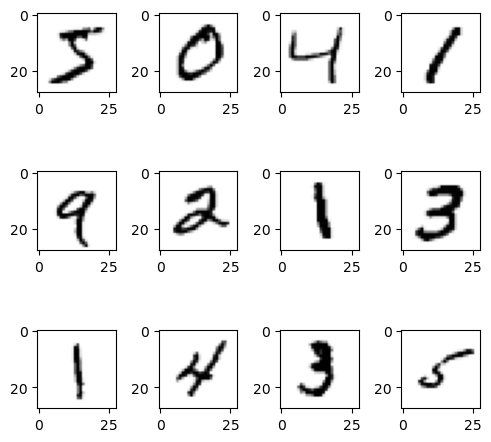

In [31]:
plt.figure(figsize=(5,5))                 # Figsize controls size of each subplot
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train[k], cmap='Greys')
    #plt.axis('off')                      # Remove the Axis from the plt and show the image only
plt.tight_layout()                        # Allwos the graphs not to overlap eachother
plt.show()

## PreProcess Data

In [32]:
# Preprocess Data
# reshape to data to match the inputs of the Neural Neural Net.  For bitmap 28x28 there are 784 pixes
# convert from int to float32 - Divide pixel values by 255,instead of values from 0 to 255 then thevalues 0 to 1
#   Best Practice -- Boolean ( 0,1 ), Continous Function ( Mean = 0 and Standard Deviation = 1 )
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

X_train /= 255
X_valid /= 255

In [33]:
print("Data Type for X_train = ", type(X_train), "and Data Type for y_train = ", type(y_train))
print("Shape for X_train = ", X_train.shape, "and Shape  for y_train = ", y_train.shape)
print("Dimension count = ", X_train.ndim, "and Shape for y_train", y_train.ndim)

Data Type for X_train =  <class 'numpy.ndarray'> and Data Type for y_train =  <class 'numpy.ndarray'>
Shape for X_train =  (60000, 784) and Shape  for y_train =  (60000,)
Dimension count =  2 and Shape for y_train 1


In [34]:
# Convert our Labels to One Hot Encdoing -- Ideal output when fed in pixels that the pixels represent 7
# For the output the 1 is located at index 8 on an 0 index array.
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)
y_valid[0] #Stop at 7:11

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

##  Design NN architecture


The data will flow sequentially through the the neural network from the input layer to the hidden layer to the 
output layer.

In [35]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))      # hidden layer
model.add(Dense(10, activation='softmax'))                          # output layer


In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Compile Model

The Optimizer take the measure where the model is incorrect and learns to reduce the incorrectness
learning rate -- How quickly the SGD should learn to minimize where the network is wrong.
metrics -- accuracy ( percentage of guesses that the model makes that are correct)

In [38]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=.01))

## Train

In [39]:
model.fit(X_train, y_train, batch_size = 128, epochs=200, verbose=1, validation_data= (X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0933 - val_loss: 0.0924
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0918 - val_loss: 0.0913
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0909 - val_loss: 0.0906
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0903 - val_loss: 0.0900
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0898 - val_loss: 0.0896
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0894 - val_loss: 0.0892
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0890 - val_loss: 0.0888
Epoch 8/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0886 - val_loss: 0.0884
Epoch 9/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0883 - val_loss: 0.0881
Epoch 10/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0879 - val_lo

469/469 [==============================] - 1s 2ms/step - loss: 0.0562 - val_loss: 0.0557
Epoch 82/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0559 - val_loss: 0.0553
Epoch 83/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0555 - val_loss: 0.0550
Epoch 84/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0551 - val_loss: 0.0546
Epoch 85/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0547 - val_loss: 0.0542
Epoch 86/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0544 - val_loss: 0.0538
Epoch 87/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0540 - val_loss: 0.0535
Epoch 88/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0536 - val_loss: 0.0531
Epoch 89/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0533 - val_loss: 0.0527
Epoch 90/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0529 - val_loss: 

Epoch 161/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0346 - val_loss: 0.0337
Epoch 162/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0344 - val_loss: 0.0336
Epoch 163/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0342 - val_loss: 0.0334
Epoch 164/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0341 - val_loss: 0.0332
Epoch 165/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0339 - val_loss: 0.0330
Epoch 166/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0337 - val_loss: 0.0329
Epoch 167/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0336 - val_loss: 0.0327
Epoch 168/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0334 - val_loss: 0.0325
Epoch 169/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0332 - val_loss: 0.0324
Epoch 170/200
469/469 [==============================] - 1s 2ms/step - lo

## Evaluating Model

In [40]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.0281


0.028087323531508446

## Performing Inference

In [41]:
valid_0 = X_valid[0].reshape(1,784)
predictions = model.predict(valid_0)
print("The predictions are ", predictions)
np.argmax( predictions, axis=-1)


1/1 [==============================] - 0s 52ms/step
The predictions are  [[0.0038423  0.00169465 0.00287818 0.00740915 0.00542499 0.00829182
  0.00100371 0.9177586  0.0028073  0.04888925]]


array([7])